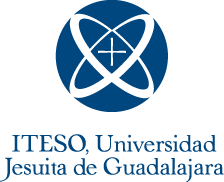

# Proyecto de Simulación Financiera

### Integrantes:
- Sofía Vázquez Guerrero - 739167 - sofia.vazquezg@iteso.mx
- Diego Ruíz González - 739792 - diego.ruiz@iteso.mx
- Michelle Goméz Lopéz - 741902 - michelle.gomez@iteso.mx

### Fecha:
- 20 de abril del 2023

### Profesor:
- Gabriel Alejandro Morales Ruíz

### Tema:
- Integración Montecarlo, selección de activos.

## Título del proyecto


Selección De Activos

## Objetivos

### Objetivo general

El objetivo de este proyecto  es combinar nuestros conocimiento de Ingeniería Financiera y Simulación, para la elección de una inversión (acción) en torno a diferentes factores que afectan su rendimiento. Es por eso que simulamos su comportamiento a través de el plazo de un año, tomando en cuenta datos históricos. Como nuestro objetivo es elegir una acción, analizamos acción por acción para después comparar los datos y a base de esto tomar nuestra decisión.

### Objetivos específicos

Primeramente, se eligen tres compañías de ámbitos distintos, en este caso fue una tecnológica, farmacéutica y alimentaria. Teniendo esto, se pueden obtener los precios de las acciones con ayuda de yahoo finance. Así mismo, se generaron sus rendimientos diarios para así graficarlos y poderlos ver visualmente. Una vez teniendo esto, se realizó una simulación en los precios. Por último, se realizaron distintas gráficas como apoyo visual para poder comparar las compañías entre sí y ver cual te genera un mejor rendimiento. 

## Modelo que representa el problema y planteamiento

Elegimos tres compañías de distintos sectores, tecnológico, farmacéutico y alimenticio, para comprobar qué tan exacto y qué tanto se acerca la simulación a los datos originales. Para realizar esta comprobación, generamos los datos de Microsoft, Johnson & Johnson y McDonald's desde el 2015 hasta el 2019, y generamos una simulación que va desde el 2020 hasta el 2021. Así mismo, escogimos una probabilidad para ver qué tan acertadas son las simulaciones comparadas a lo que realmente pasó para poder decidir cuál de las tres es la más conveniente. 

## Solución y visualización

In [1]:
import yfinance as yf
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def getClose(names, start, end):
    return yf.download(names, start=start, end=end)["Adj Close"]

In [142]:
ticker = "MSFT", "JNJ", "MCD"
periodos = 1257 # Cantidad en dias de simulaciones
inicio = "2015-01-01" #inicio de datos
final = "2019-12-31" #final de datos
fecha = "2020-01-01" # Primer dato a simular
ffinal = "2021-12-31" #ultimo dato a simular
per = 700 # Datos futuros a simular
data_acciones = getClose(ticker,inicio,final)
data_acciones.describe()


[*********************100%***********************]  3 of 3 completed


,JNJ,MCD,MSFT
count,1257.000000,1257.000000,1257.000000
mean,105.343029,128.749054,75.879023
std,16.359748,36.309769,32.134856
min,74.265526,71.695610,35.172421
25%,90.512573,98.575729,48.015263
50%,108.434914,134.203751,65.888870
75%,119.315796,153.303741,101.324776
max,134.532013,202.793579,154.152008


<Axes: ylabel='Frequency'>

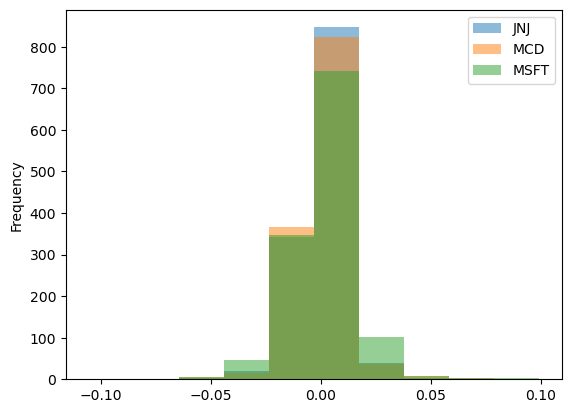

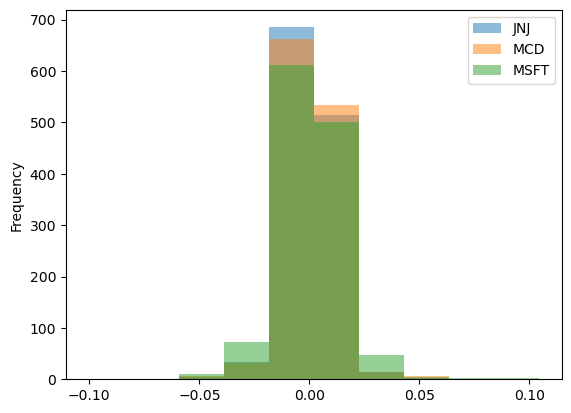

In [143]:
R = (data_acciones - data_acciones.shift())/data_acciones.shift()
r = np.log(data_acciones/data_acciones.shift())

r.plot.hist(alpha = 0.5)
R.plot.hist(alpha = 0.5)

In [144]:
R_msft_mean = R["MSFT"].mean()
R_msft_std = R["MSFT"].std()

R_mcd_mean = R["MCD"].mean()
R_mcd_std = R["MCD"].std()

R_jnj_mean = R["JNJ"].mean()
R_jnj_std = R["JNJ"].std()

In [145]:
def sim_r(media, std, inicio, dias, N):
    # media 
    # desviación estándar
    # desde qué fecha inicio a simular
    # cuántos días voy a simular
    # N: cuántas simulaciones
    r = np.random.normal(media, std, size=(dias, N))
    fechas = pd.date_range(inicio, periods=dias)
    return pd.DataFrame(index = fechas, data = r)
r_msft_simulados = sim_r(R_msft_mean, R_msft_std, fecha, per, 10000)
r_mcd_simulados = sim_r(R_mcd_mean, R_mcd_std, fecha, per, 10000)
r_jnj_simulados = sim_r(R_jnj_mean, R_jnj_std, fecha, per, 10000)

In [146]:
ra_msft_simulados = (r_msft_simulados + 1).cumprod() # r_simulados son cumprod es producto acumulado
ra_msft_simulados

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2020-01-01,0.978850,1.005212,1.013302,1.017862,0.991978,0.985797,1.022183,1.010862,1.010520,1.001679,...,0.993050,0.974745,0.997066,1.004430,1.000837,1.003285,1.029890,0.982909,1.027610,0.978293
2020-01-02,0.975991,1.005114,1.042645,1.022450,0.984526,0.963406,1.032453,1.019396,1.004080,0.998607,...,1.004422,1.005700,0.998819,1.015765,1.016973,0.969442,1.046787,0.969860,1.033096,0.965816
2020-01-03,0.986044,1.014369,1.062003,1.034056,1.009207,0.969964,1.049795,1.013329,0.995511,0.978263,...,1.023223,1.010289,0.995263,1.035037,0.998003,0.944828,1.061143,0.971119,1.016717,0.986266
2020-01-04,0.988284,1.025719,1.067597,1.037695,1.026435,0.972402,1.063418,0.995745,1.001001,0.961833,...,1.040760,1.001004,1.021525,1.019970,0.983739,0.941261,1.091337,0.957095,1.017058,0.975504
2020-01-05,1.011369,1.036437,1.072808,1.046936,1.010698,0.977051,1.082803,0.994410,1.012843,0.955607,...,1.045076,0.996550,1.024321,1.032811,0.982228,0.940349,1.094620,0.970432,1.026065,0.977098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-26,3.204927,2.169664,1.957835,3.224092,1.511857,1.363464,2.502220,2.677452,1.621622,2.791184,...,1.543416,2.909783,1.444386,1.471289,2.662545,1.739954,2.543156,2.412108,1.102053,4.026556
2021-11-27,3.223150,2.191982,1.916421,3.210982,1.509599,1.333378,2.609986,2.708911,1.652584,2.766076,...,1.526027,2.914968,1.406400,1.514989,2.647984,1.747129,2.570501,2.450797,1.095230,4.007347
2021-11-28,3.258745,2.203793,1.947553,3.114278,1.501387,1.352151,2.568395,2.724484,1.650592,2.755849,...,1.552575,2.916968,1.410692,1.512156,2.641631,1.713556,2.595875,2.450802,1.102385,3.995632
2021-11-29,3.327841,2.209529,1.949985,3.140474,1.488340,1.322282,2.601914,2.798463,1.647931,2.706981,...,1.567417,2.928278,1.413501,1.479453,2.602398,1.719717,2.612990,2.521998,1.106075,3.996292


In [147]:
ra_mcd_simulados = (r_mcd_simulados + 1).cumprod() # r_simulados son cumprod es producto acumulado
ra_mcd_simulados

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2020-01-01,0.993484,1.005839,0.996416,1.015156,0.990601,1.009710,1.018639,1.018570,1.000890,0.980137,...,1.005506,0.997730,0.996241,0.985556,1.019215,0.990084,1.008581,0.998602,1.005591,0.994776
2020-01-02,0.985321,1.008688,0.986330,0.996074,0.991469,1.004446,1.023611,1.031471,1.000311,0.986334,...,1.022825,1.011628,1.011096,0.991151,1.029919,0.998144,1.005588,0.989416,0.988847,0.983602
2020-01-03,0.975162,1.015923,0.978429,0.992689,0.993452,1.019302,1.050995,1.029840,0.991342,0.995657,...,1.024069,1.009141,1.022993,0.993830,1.030646,1.017616,1.018178,0.987194,0.996332,0.970623
2020-01-04,0.972909,1.026496,0.984063,1.003738,1.000780,1.013205,1.055892,1.025835,0.991450,0.998620,...,1.028974,1.010190,1.035516,0.988883,1.036586,1.029932,1.023532,0.990906,0.991936,0.984671
2020-01-05,0.979351,1.041878,0.976912,0.997629,1.005442,1.002546,1.047856,1.028405,0.992630,0.986242,...,1.035497,1.021570,1.029709,0.984445,1.045691,1.036760,1.027822,0.976539,0.984606,0.991178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-26,2.030617,1.399017,1.275474,1.443373,2.042356,2.035803,2.064730,1.974625,1.661037,1.571744,...,2.019286,2.208630,1.049509,1.935911,1.337083,1.483232,1.069624,1.890289,1.506013,1.019771
2021-11-27,1.992241,1.375717,1.290193,1.445951,2.021311,2.062274,2.031060,1.957028,1.679397,1.559474,...,2.064676,2.216661,1.040128,1.901498,1.344265,1.483482,1.071019,1.895951,1.497871,1.025390
2021-11-28,1.998955,1.364044,1.266645,1.469818,2.054468,2.093896,2.033979,1.945654,1.693799,1.523868,...,2.074119,2.196509,1.026679,1.915056,1.326257,1.492517,1.076162,1.907050,1.497072,1.009513
2021-11-29,2.000276,1.358440,1.296979,1.459564,2.037991,2.066512,2.040040,1.934740,1.685176,1.513669,...,2.092848,2.209620,1.020118,1.917897,1.342371,1.472749,1.081932,1.878738,1.502520,1.023725


In [148]:
ra_jnj_simulados = (r_jnj_simulados + 1).cumprod() # r_simulados son cumprod es producto acumulado
ra_jnj_simulados

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2020-01-01,0.995488,0.994075,0.989052,1.000583,0.995391,0.986636,1.007188,1.004892,1.017137,0.994381,...,1.005045,0.993155,1.007827,1.013983,0.999157,1.006134,1.003805,0.993034,0.987587,1.011575
2020-01-02,0.994863,1.012434,1.000029,0.995323,0.975815,0.982557,1.002155,1.018923,1.014439,1.013618,...,1.002660,1.004549,1.019949,1.010206,1.008450,0.978079,0.986996,0.982271,1.000785,1.035961
2020-01-03,0.997837,1.007546,1.019800,0.984772,0.974253,0.986511,0.986565,1.005563,1.014222,1.005421,...,1.019456,1.001731,1.025629,1.003543,1.008820,0.967340,0.982511,0.986341,1.012868,1.034589
2020-01-04,1.014201,1.014608,1.006776,0.988038,0.979469,0.993906,0.967524,0.994330,1.030974,1.016358,...,1.020543,0.991498,1.040332,0.996125,1.022760,0.983946,0.978557,0.978011,1.026327,1.042501
2020-01-05,1.007036,1.031172,0.997324,0.984134,1.003899,0.985269,0.972019,1.012612,1.027069,1.009260,...,1.018273,0.991648,1.056516,0.994280,1.010964,0.989402,0.962092,0.958467,1.035524,1.053788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-26,1.106280,0.879227,1.338628,1.602022,1.585361,1.540994,1.126170,1.050264,1.843436,0.970692,...,1.400148,1.191057,0.851842,1.336078,1.248632,1.674038,2.038223,1.547645,0.959930,2.036096
2021-11-27,1.115126,0.877128,1.336352,1.617208,1.581117,1.525400,1.115691,1.065134,1.829407,0.967392,...,1.400046,1.199255,0.856342,1.339574,1.247036,1.694654,2.054592,1.536934,0.940979,2.027576
2021-11-28,1.125197,0.888804,1.343952,1.615833,1.582889,1.538489,1.131592,1.059377,1.824292,0.974032,...,1.393562,1.216546,0.865458,1.349567,1.245949,1.687887,2.056960,1.539933,0.958872,2.041202
2021-11-29,1.131059,0.889389,1.332781,1.628185,1.589994,1.521697,1.112969,1.068505,1.783190,0.967605,...,1.402253,1.206871,0.878776,1.357899,1.235708,1.676566,2.040150,1.542510,0.968268,2.003848


In [149]:
precios_msft_simulados = (r_msft_simulados + 1).cumprod()*data_acciones["MSFT"][-1] # r_simulados son cumprod es producto acumulado
precios_msft_simulados

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2020-01-01,149.591260,153.619895,154.856228,155.553167,151.597425,150.652932,156.213435,154.483444,154.431051,153.080053,...,151.761245,148.963816,152.375008,153.500373,152.951331,153.325398,157.391335,150.211566,157.042819,149.506091
2020-01-02,149.154314,153.605021,159.340639,156.254314,150.458612,147.231037,157.782960,155.787624,153.446869,152.610519,...,153.499196,153.694539,152.642960,155.232704,155.417297,148.153504,159.973608,148.217348,157.881225,147.599267
2020-01-03,150.690606,155.019317,162.298932,158.028051,154.230433,148.233264,160.433298,154.860363,152.137369,149.501480,...,156.372447,154.395834,152.099541,158.177876,152.518278,144.391813,162.167550,148.409700,155.378186,150.724527
2020-01-04,151.032927,156.753871,163.153776,158.584061,156.863307,148.605808,162.515150,152.173153,152.976474,146.990588,...,159.052443,152.976888,156.112981,155.875367,150.338298,143.846757,166.781867,146.266566,155.430223,149.079923
2020-01-05,154.560891,158.391869,163.950125,159.996420,154.458264,149.316317,165.477701,151.969203,154.786093,146.039194,...,159.712076,152.296179,156.540299,157.837758,150.107384,143.707309,167.283616,148.304732,156.806766,149.323388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-26,489.787929,331.575493,299.203081,492.716711,231.047238,208.369232,382.397890,409.177315,247.821766,426.558356,...,235.870176,444.682942,220.736003,224.847410,406.899272,265.905746,388.653867,368.626571,168.419577,615.352016
2021-11-27,492.572773,334.986172,292.874089,490.713229,230.702062,203.771412,398.867004,413.985036,252.553585,422.721265,...,233.212613,445.475394,214.930803,231.525862,404.673968,267.002225,392.832720,374.539148,167.376858,612.416549
2021-11-28,498.012520,336.791171,297.631781,475.934633,229.447180,206.640336,392.510880,416.364905,252.249075,421.158228,...,237.269830,445.781055,215.586811,231.092796,403.703127,261.871432,396.710530,374.540007,168.470206,610.626187
2021-11-29,508.572084,337.667842,298.003412,479.938021,227.453291,202.075661,397.633453,427.670647,251.842472,413.690079,...,239.538015,447.509515,216.016083,226.095069,397.707384,262.813087,399.326061,385.420355,169.034233,610.727018


In [150]:
precios_mcd_simulados = (r_mcd_simulados + 1).cumprod()*data_acciones["MCD"][-1] # r_simulados son cumprod es producto acumulado
precios_mcd_simulados

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2020-01-01,181.457660,183.714216,181.993233,185.415945,180.931009,184.421209,186.052143,186.039523,182.810387,179.019761,...,183.653363,182.233162,181.961226,180.009707,186.157336,180.836566,184.215103,182.392522,183.669051,181.693638
2020-01-02,179.966610,184.234538,180.151036,181.930793,181.089527,183.459879,186.960258,188.395971,182.704495,180.151632,...,186.816711,184.771693,184.674470,181.031588,188.112356,182.308799,183.668349,180.714610,180.610665,179.652653
2020-01-03,178.111153,185.556023,178.707959,181.312411,181.451834,186.173249,191.961952,188.098048,181.066406,181.854577,...,187.043880,184.317353,186.847490,181.520787,188.245183,185.865319,185.967895,180.308705,181.977748,177.282049
2020-01-04,177.699667,187.487265,179.736903,183.330517,182.790236,185.059699,192.856373,187.366549,181.086055,182.395659,...,187.939864,184.509052,189.134775,180.617308,189.330059,188.114767,186.945767,180.986749,181.174905,179.847993
2020-01-05,178.876323,190.296696,178.430747,182.214754,183.641677,183.112855,191.388533,187.835922,181.301666,180.134882,...,189.131274,186.587417,188.074057,179.806737,190.993077,189.361979,187.729474,178.362692,179.836187,181.036460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-26,370.887622,255.527305,232.962445,263.628956,373.031847,371.834869,377.118419,360.660833,303.384712,287.075622,...,368.818125,403.401448,191.690428,353.589934,244.215266,270.909120,195.364446,345.257015,275.069843,186.258874
2021-11-27,363.878487,251.271722,235.650913,264.099782,369.188025,376.669850,370.968613,357.446809,306.738092,284.834403,...,377.108500,404.868202,189.977019,347.304396,245.527099,270.954750,195.619235,346.291175,273.582765,187.285219
2021-11-28,365.104636,249.139660,231.349816,268.458984,375.244101,382.445521,371.501732,355.369391,309.368647,278.331144,...,378.833310,401.187436,187.520632,349.780769,242.237881,272.604852,196.558667,348.318383,273.436795,184.385349
2021-11-29,365.346016,248.115989,236.890386,266.586214,372.234542,377.443833,372.608712,353.376004,307.793635,276.468291,...,382.254130,403.582104,186.322207,350.299562,245.181172,268.994290,197.612557,343.147401,274.431967,186.981129


In [151]:
precios_jnj_simulados = (r_jnj_simulados + 1).cumprod()*data_acciones["JNJ"][-1] # r_simulados son cumprod es producto acumulado
precios_jnj_simulados

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2020-01-01,132.882395,132.693795,132.023308,133.562485,132.869447,131.700846,134.444146,134.137770,135.772185,132.734598,...,134.158193,132.570980,134.529541,135.351246,133.372130,134.303469,133.992661,132.554841,131.827772,135.029847
2020-01-02,132.798973,135.144397,133.488572,132.860357,130.256428,131.156353,133.772336,136.010585,135.412129,135.302508,...,133.839833,134.091977,136.147556,134.847063,134.612659,130.558626,131.748896,131.118197,133.589448,138.284909
2020-01-03,133.196045,134.491928,136.127669,131.451988,130.047916,131.684161,131.691389,134.227321,135.383137,134.208315,...,136.081827,133.715838,136.905810,133.957580,134.661989,129.125105,131.150189,131.661501,135.202450,138.101761
2020-01-04,135.380317,135.434701,134.389173,131.887900,130.744104,132.671288,129.149665,132.727896,137.619257,135.668212,...,136.226863,132.349888,138.868464,132.967420,136.522775,131.341801,130.622368,130.549530,136.998989,139.157962
2020-01-05,134.423848,137.645707,133.127500,131.366845,134.005181,131.518360,129.749726,135.168240,137.097964,134.720821,...,135.923817,132.369857,141.028784,132.721196,134.948245,132.070080,128.424521,127.940753,138.226681,140.664650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-26,147.671494,117.363362,178.686310,213.845480,211.621515,205.699108,150.326411,140.194179,246.070537,129.572567,...,186.898298,158.987884,113.707907,178.345930,166.673290,223.458439,272.071593,206.586925,128.135986,271.787674
2021-11-27,148.852315,117.083166,178.382582,215.872583,211.054928,203.617594,148.927655,142.179132,244.197847,129.132075,...,186.884740,160.082168,114.308620,178.812706,166.460193,226.210341,274.256589,205.157234,125.606293,270.650452
2021-11-28,150.196584,118.641707,179.397000,215.688982,211.291515,205.364777,151.050166,141.410575,243.515047,130.018430,...,186.019254,162.390339,115.525359,180.146538,166.315182,225.307148,274.572758,205.557473,127.994814,272.469192
2021-11-29,150.979034,118.719796,177.905933,217.337864,212.239886,203.123335,148.564376,142.629082,238.028558,129.160458,...,187.179345,161.098879,117.303188,181.258710,164.948157,223.795974,272.328889,205.901481,129.248927,267.483125


Text(0.5, 1.0, 'Johnson & Johnson (media)')

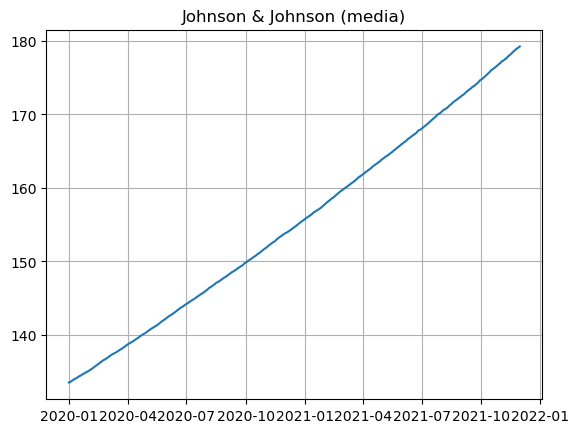

In [152]:
plt.figure()
plt.plot(precios_jnj_simulados.mean(axis=1))
plt.grid()
plt.title("Johnson & Johnson (media)")

Text(0.5, 1.0, 'Johnson & Johnson (min)')

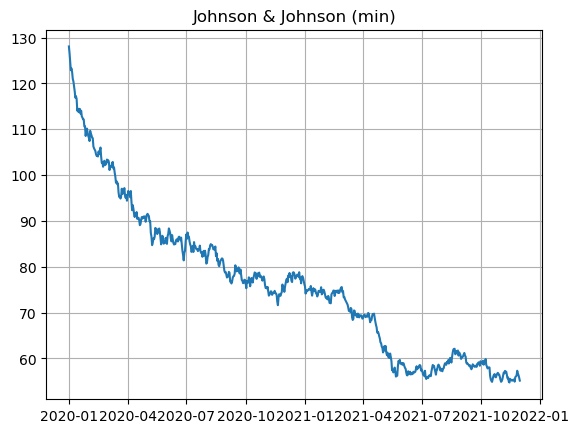

In [153]:
plt.figure()
plt.plot(precios_jnj_simulados.min(axis=1))
plt.grid()
plt.title("Johnson & Johnson (min)")

Text(0.5, 1.0, 'Johnson & Johnson (max)')

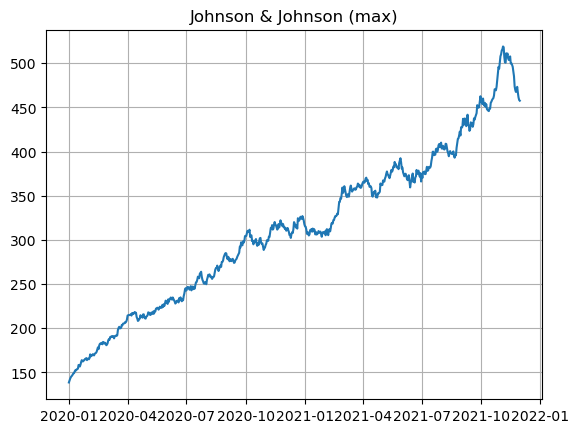

In [154]:
plt.figure()
plt.plot(precios_jnj_simulados.max(axis=1))
plt.grid()
plt.title("Johnson & Johnson (max)")

Text(0.5, 1.0, 'McDonalds (media)')

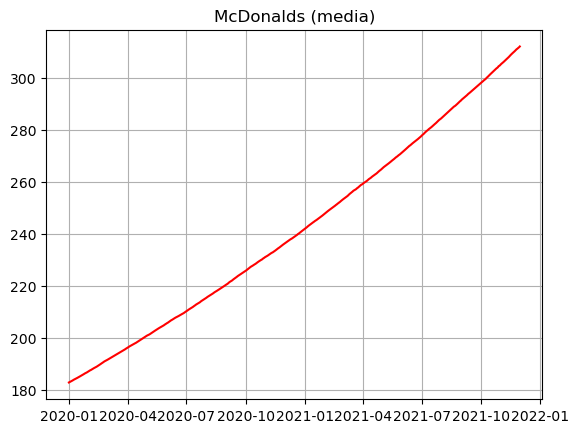

In [155]:
plt.figure()
plt.plot(precios_mcd_simulados.mean(axis=1), color='red')
plt.grid()
plt.title("McDonalds (media)")

Text(0.5, 1.0, 'McDonalds (min)')

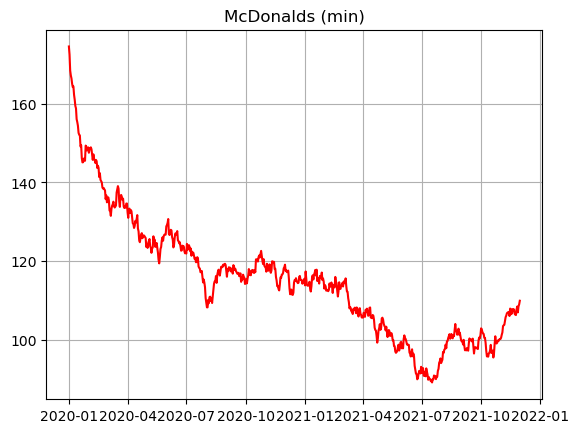

In [156]:
plt.figure()
plt.plot(precios_mcd_simulados.min(axis=1), color='red')
plt.grid()
plt.title("McDonalds (min)")

Text(0.5, 1.0, 'McDonalds (max)')

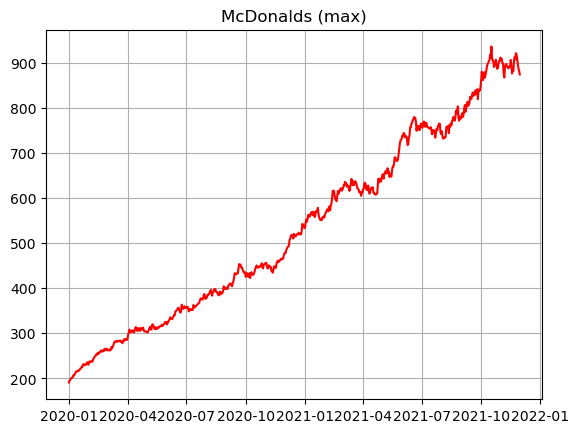

In [157]:
plt.figure()
plt.plot(precios_mcd_simulados.max(axis=1), color='red')
plt.grid()
plt.title("McDonalds (max)")

Text(0.5, 1.0, 'Microsoft (media)')

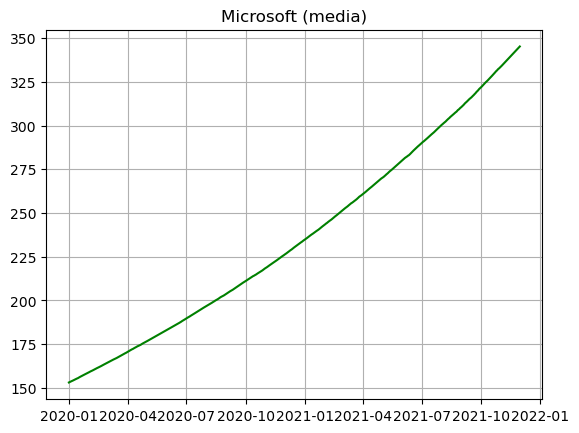

In [158]:
plt.figure()
plt.plot(precios_msft_simulados.mean(axis=1), color='green')
plt.grid()
plt.title("Microsoft (media)")

Text(0.5, 1.0, 'Microsoft (min)')

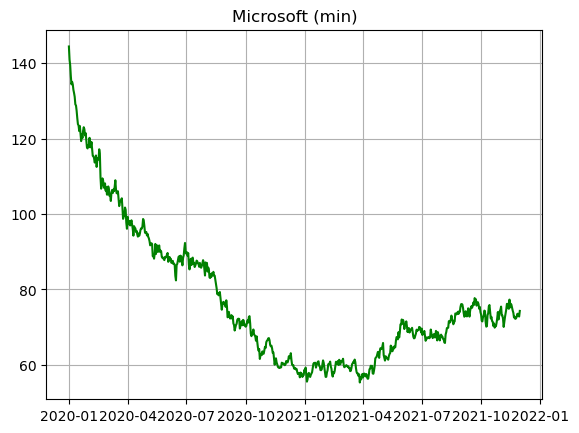

In [159]:
plt.figure()
plt.plot(precios_msft_simulados.min(axis=1), color='green')
plt.grid()
plt.title("Microsoft (min)")

Text(0.5, 1.0, 'Microsoft (max)')

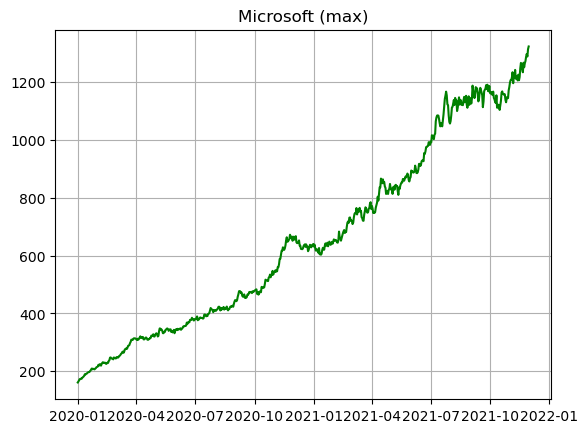

In [160]:
plt.figure()
plt.plot(precios_msft_simulados.max(axis=1), color='green')
plt.grid()
plt.title("Microsoft (max)")

Text(0.5, 1.0, 'Comparación de MEDIAs')

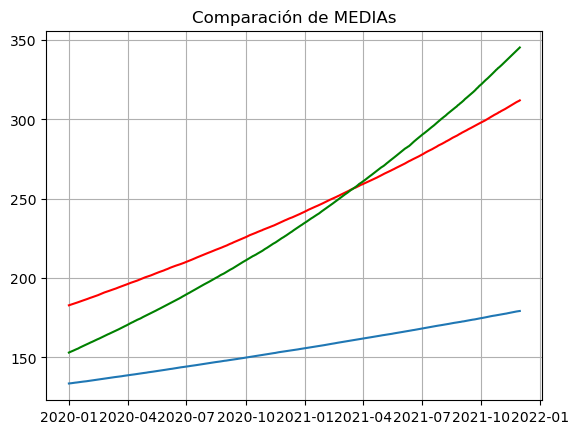

In [161]:
plt.figure()
plt.plot(precios_jnj_simulados.mean(axis=1))
plt.plot(precios_mcd_simulados.mean(axis=1), color='red')
plt.plot(precios_msft_simulados.mean(axis=1), color='green')
plt.grid()
plt.title("Comparación de MEDIAs")

Text(0.5, 1.0, 'Comparación de MÍNIMOS')

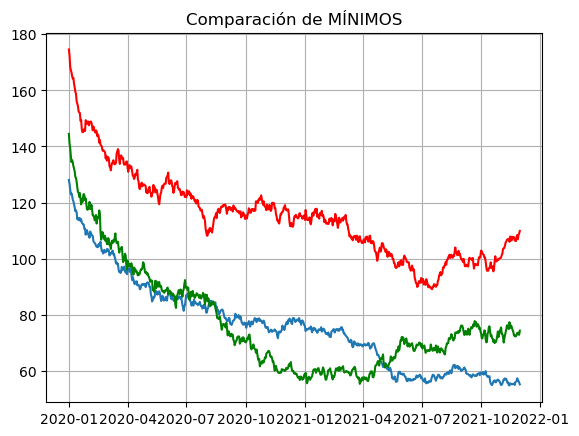

In [162]:
plt.figure()
plt.plot(precios_jnj_simulados.min(axis=1))
plt.plot(precios_mcd_simulados.min(axis=1), color='red')
plt.plot(precios_msft_simulados.min(axis=1), color='green')
plt.grid()
plt.title("Comparación de MÍNIMOS")

Text(0.5, 1.0, 'Comparación de MÁXIMOS')

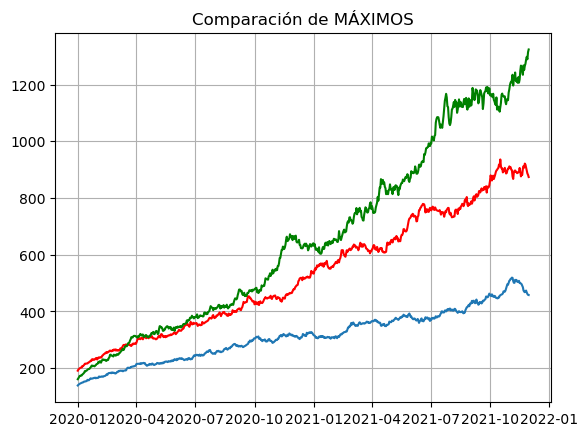

In [163]:
plt.figure()
plt.plot(precios_jnj_simulados.max(axis=1))
plt.plot(precios_mcd_simulados.max(axis=1), color='red')
plt.plot(precios_msft_simulados.max(axis=1), color='green')
plt.grid()
plt.title("Comparación de MÁXIMOS")

In [164]:
def getClose(name,start,end):
    return yf.download(name,start=start,end=end)["Adj Close"]

In [165]:
data_jnj= getClose(["JNJ"], start="2020-01-01", end="2021-12-31")
data_mcd= getClose(["MCD"], start="2020-01-01", end="2021-12-31")
data_msft=getClose(["MSFT"], start="2020-01-01", end="2021-12-31")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [166]:
RJ = (data_jnj - data_jnj.shift())/data_jnj.shift()
RJ

Date
2020-01-02         NaN
2020-01-03   -0.011578
2020-01-06   -0.001247
2020-01-07    0.006107
2020-01-08   -0.000138
                ...   
2021-12-23    0.001906
2021-12-27    0.008440
2021-12-28    0.004008
2021-12-29    0.007044
2021-12-30    0.004430
Name: Adj Close, Length: 504, dtype: float64

In [167]:
RMC = (data_mcd - data_mcd.shift())/data_mcd.shift()
RMC

Date
2020-01-02         NaN
2020-01-03   -0.003536
2020-01-06    0.011245
2020-01-07    0.001483
2020-01-08    0.016187
                ...   
2021-12-23    0.003812
2021-12-27    0.008610
2021-12-28   -0.001342
2021-12-29    0.002277
2021-12-30   -0.004767
Name: Adj Close, Length: 504, dtype: float64

In [168]:
RM = (data_msft - data_msft.shift())/data_msft.shift()
RM

Date
2020-01-02         NaN
2020-01-03   -0.012452
2020-01-06    0.002585
2020-01-07   -0.009118
2020-01-08    0.015928
                ...   
2021-12-23    0.004472
2021-12-27    0.023186
2021-12-28   -0.003504
2021-12-29    0.002051
2021-12-30   -0.007691
Name: Adj Close, Length: 504, dtype: float64

In [169]:
RJ.describe()

count    503.000000
mean       0.000544
std        0.014969
min       -0.072984
25%       -0.005817
50%        0.000407
75%        0.006762
max        0.079977
Name: Adj Close, dtype: float64

In [170]:
RMC.describe()

count    503.000000
mean       0.000845
std        0.019126
min       -0.158753
25%       -0.005393
50%        0.000911
75%        0.007914
max        0.181254
Name: Adj Close, dtype: float64

In [171]:
RM.describe()

count    503.000000
mean       0.001761
std        0.021697
min       -0.147390
25%       -0.007157
50%        0.001484
75%        0.011868
max        0.142169
Name: Adj Close, dtype: float64

In [172]:
realesJ = getClose(["JNJ"], start="2020-01-01", end="2021-12-31")
realesMC = getClose(["MCD"], start="2020-01-01", end="2021-12-31")
realesM = getClose(["MSFT"], start="2020-01-01", end="2021-12-31")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

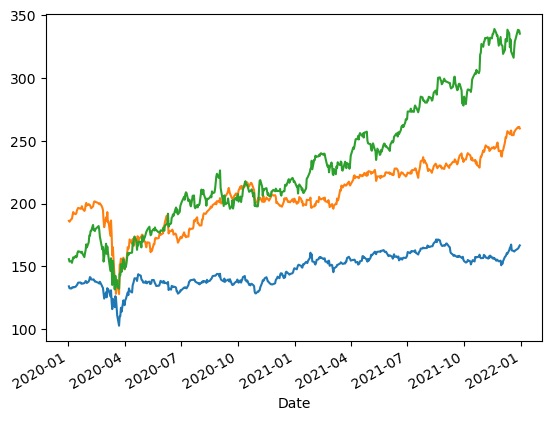

In [173]:
plt.figure() #grafica de los precios reales
realesJ.plot()
realesMC.plot()
realesM.plot()

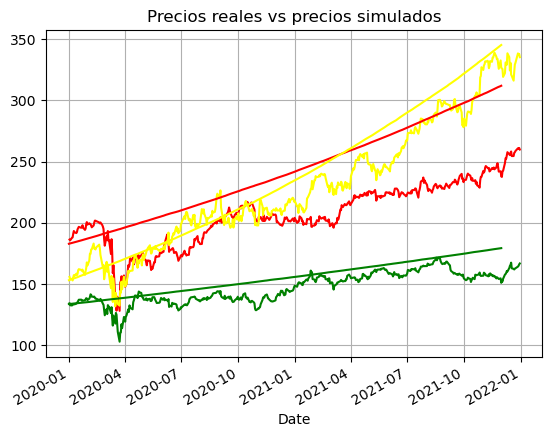

In [175]:
plt.figure() #grafica de los precios reales
realesJ.plot(color="green")
realesMC.plot(color="red")
realesM.plot(color="yellow")
plt.title("Precios reales vs precios simulados")
plt.plot(precios_jnj_simulados.mean(axis=1), color='green')
plt.plot(precios_mcd_simulados.mean(axis=1), color='red')
plt.plot(precios_msft_simulados.mean(axis=1), color='yellow')
plt.grid()

Viendo las gráficas podemos concluir que la mejor opción para invertir fue la de Microsoft. La que mejor rendimiento te hubiera dado. Podemos notar que en pandemia tuvo un retroceso en todas las acciones. Sin embargo Microsoft pudo recuperarse e incrementar su precio. Y también como la gráfica máxima, es la que mejor nos hubiera ido. 


## Conclusiones

En conclusión se cumplieron con los objetivos esperados, ya que pudimos identificar cuál compañía era la mejor opción para invertir en base a los resultados obtenidos. La integración Montecarlo, nos permitió realizar este ejercicio de forma sencilla y más rápida que otros métodos. 

Por otra parte, simular nos permite conocer los escenarios posibles a los que nos podemos enfrenta, evitando el riesgo de perdida e incluso asegurando un rendimiento mayor.  En este caso pudimos observar que Microsoft (MSFT), fue la empresa que te puede generar un mayor rendimiento, ya que a comparación de las otras dos, está fue la que se recupero mas rápido tras la pandemia y es la que tuvo un mayor crecimiento. Así mismo, comparado la simulación con la gráfica de los precios reales, podemos observar qué se asimila bastante. 

## Referencias

- Qué son activos financieros y para qué se utilizan? (s/f). Expansion.com. Recuperado el 20 de abril de 2023, de https://www.expansion.com/economia-para-todos/economia/que-son-activos-financieros-y-para-que-se-utilizan.html
- ¿Qué son activos financieros y para qué se utilizan? (n.d.). https://www.expansion.com/economia-para-todos/economia/que-son-activos-financieros-y-para-que-se-utilizan.html#:~:text=Un%20activo%20es%20algo%20que,que%20le%20produzca%20un%20rendimiento